<h3>Classify the Size_Categorie using SVM</h3>
<ul>
<li>month - month of the year: 'jan' to 'dec'</li>
<li>day	- day of the week: 'mon' to 'sun'</li>
<li>FFMC - FFMC index from the FWI system: 18.7 to 96.20</li>
<li>DMC - DMC index from the FWI system: 1.1 to 291.3</li>
<li>DC - DC index from the FWI system: 7.9 to 860.6</li>
<li>ISI - ISI index from the FWI system: 0.0 to 56.10</li>
<li>temp - temperature in Celsius degrees: 2.2 to 33.30</li>
<li>RH - relative humidity in %: 15.0 to 100</li>
<li>wind - wind speed in km/h: 0.40 to 9.40</li>
<li>rain - outside rain in mm/m2 : 0.0 to 6.4</li>
<li>Size_Categorie 	the burned area of the forest ( Small , Large)</li>
    </ul>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\kumar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading Dataset
forest=pd.read_csv("D:\\execlr\\Assignments\\Assignment 17\\forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
#Dropping columns which aren't required
data = forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep','month','day'], 
                 axis = 1)
data


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [4]:
data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 40.5+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


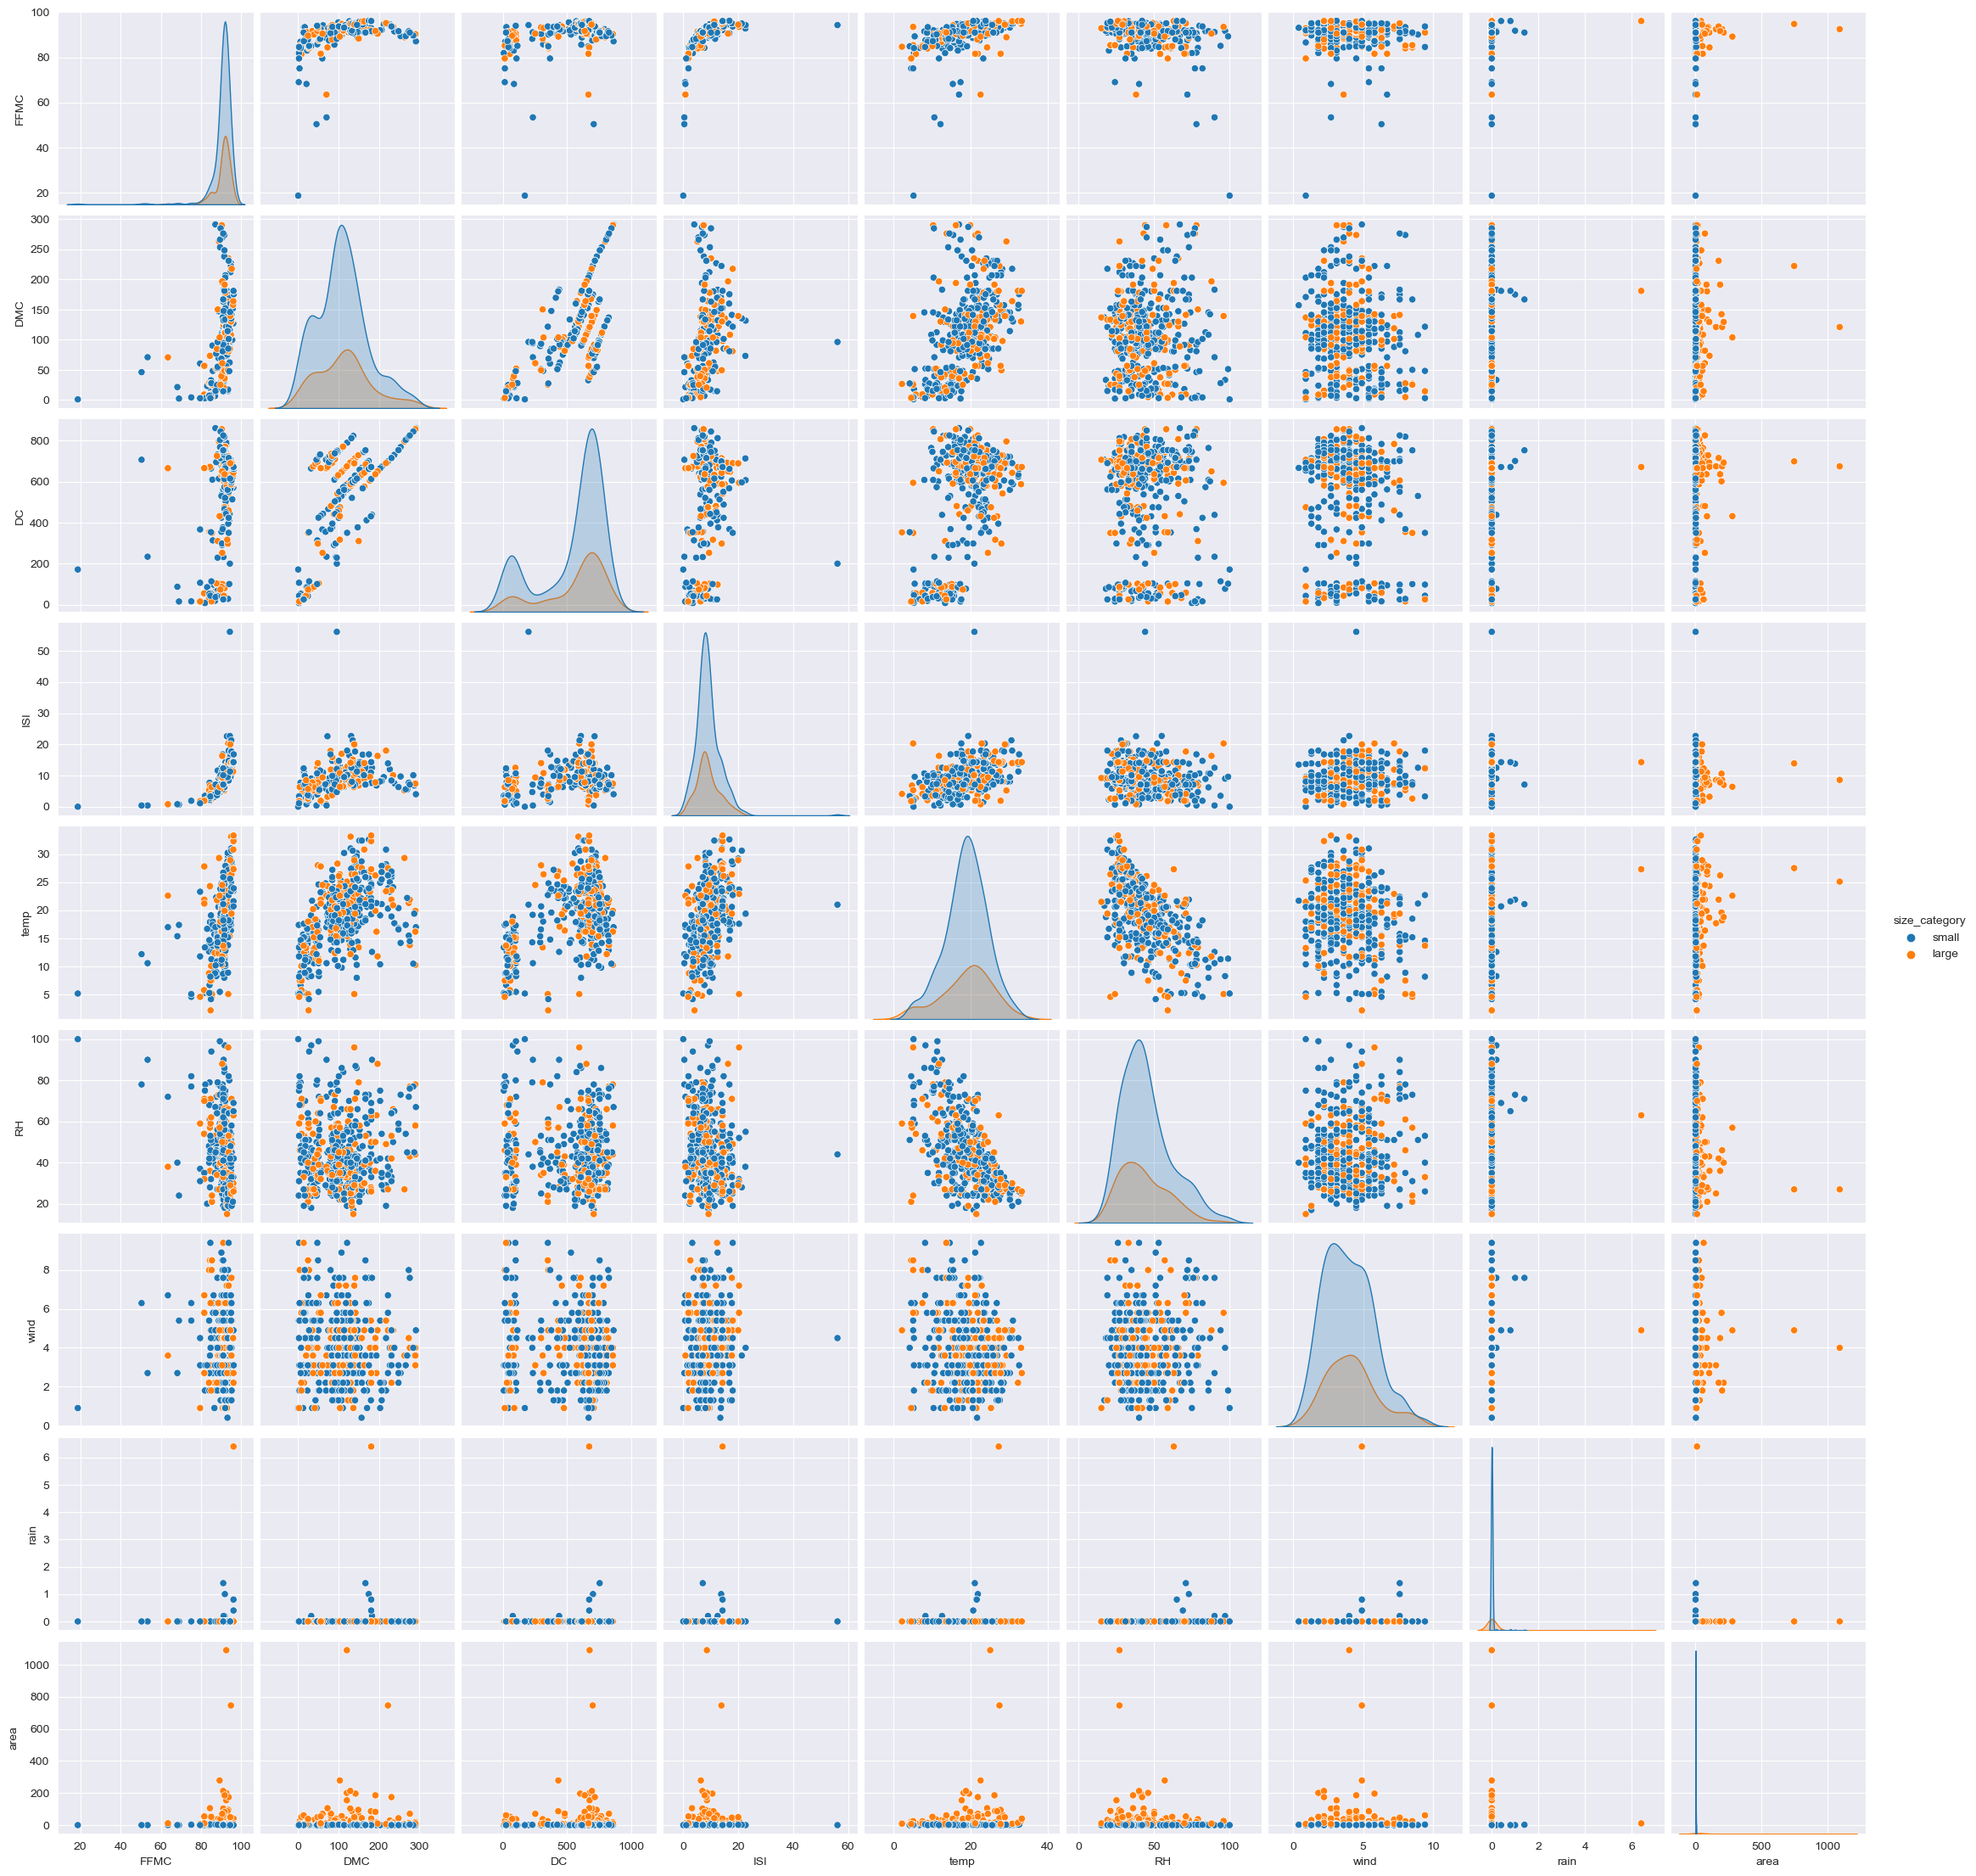

In [7]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='size_category')
plt.show()

In [8]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


In [9]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area')])

In [10]:
#Checking how much datapoints are having small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [11]:
sns.countplot(x = 'size_category',data =data)

<AxesSubplot:xlabel='size_category', ylabel='count'>

<h3>Data Preprocessing</h3>

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [13]:
array=data.values
x=array[:,0:-1]
y=array[:,-1]

In [14]:
x

array([[ 86.2 ,  26.2 ,  94.3 , ...,   6.7 ,   0.  ,   0.  ],
       [ 90.6 ,  35.4 , 669.1 , ...,   0.9 ,   0.  ,   0.  ],
       [ 90.6 ,  43.7 , 686.9 , ...,   1.3 ,   0.  ,   0.  ],
       ...,
       [ 81.6 ,  56.7 , 665.6 , ...,   6.7 ,   0.  ,  11.16],
       [ 94.4 , 146.  , 614.7 , ...,   4.  ,   0.  ,   0.  ],
       [ 79.5 ,   3.  , 106.7 , ...,   4.5 ,   0.  ,   0.  ]])

In [15]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

<h3>classification model using SVM</h3>

In [17]:
clf = SVC()
param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[50,5,10,0.5,0.1,10],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 0.1, 10],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [18]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9861872146118721)

<h3>SVM with Kernel Linear</h3>

In [28]:
clf = SVC(kernel="linear",C = 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 98.71794871794873


array([[ 47,   2],
       [  0, 107]], dtype=int64)

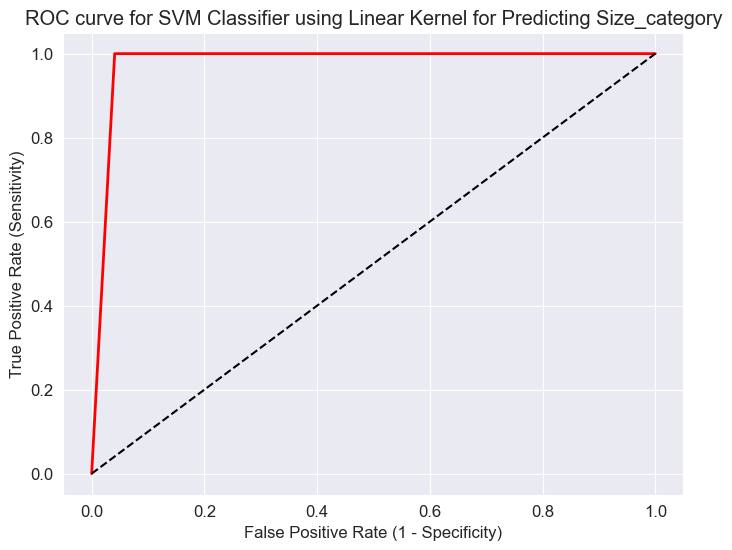

ROC AUC : 0.9796


In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

<h3>SVM with Kernel Poly</h3>

In [21]:
clf = SVC(kernel="poly",C = 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 95.51282051282051


array([[ 44,   5],
       [  2, 105]], dtype=int64)

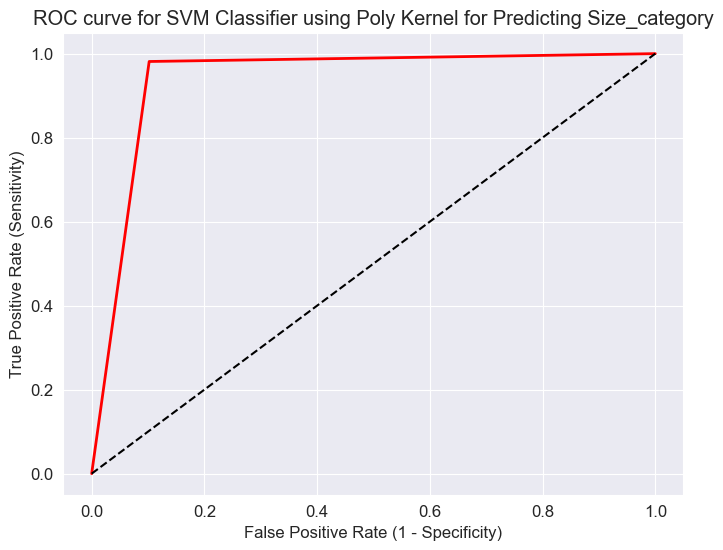

ROC AUC : 0.9396


In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Poly Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

<h3>SVM with Kernel RBF</h3>

In [23]:
clf = SVC(kernel="rbf",C = 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 69.23076923076923


array([[  1,  48],
       [  0, 107]], dtype=int64)

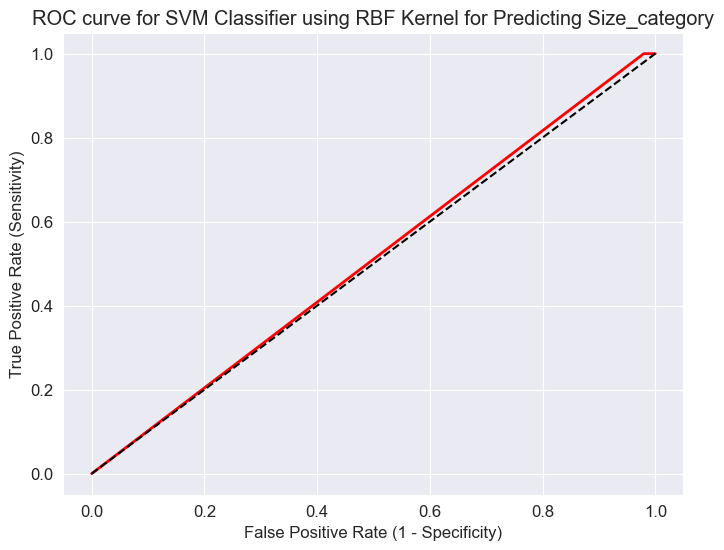

ROC AUC : 0.5102


In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using RBF Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

<h3>SVM with Kernel Sigmoid</h3>

In [25]:
clf = SVC(kernel="sigmoid",C = 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 68.58974358974359


array([[  0,  49],
       [  0, 107]], dtype=int64)

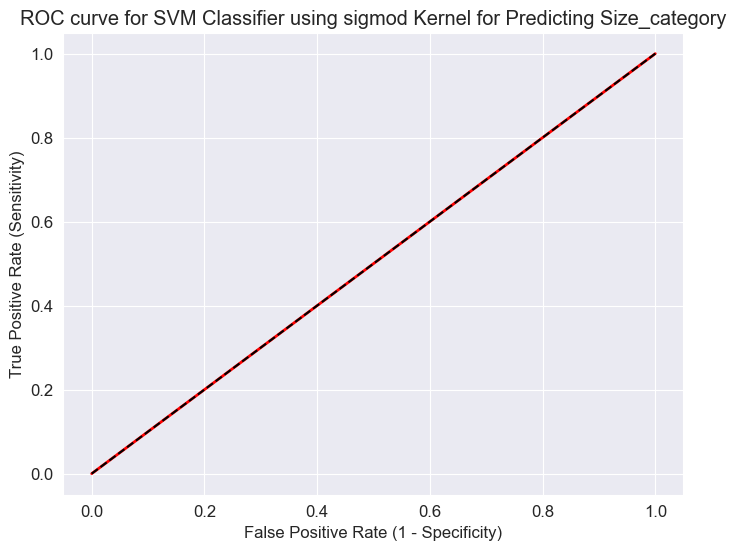

ROC AUC : 0.5000


In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using sigmod Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

<h3>Conclusion</h3>
<ul>
    <li>We get maximum accuracy with linear kernel with train accuracy is 100% and testing accuracy 99.35%. So, we can conclude that our model is doing a very good job in terms of predicting the class labels.</li>
    <li>ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.</li>
    <li>Our model test with linear kernel accuracy is 0.9985 while GridSearch CV score on test-set is 0.9871.</li>
    </ul>

